<h1 align=center><font size = 5> K-Means Clustering Exercises in R</font></h1>

   ### Exercise 1: Wholesale Customer Analysis

A wholesale distributor wants to design a targeted marketing campaign based on their customers' spendings.
We have set of customer annual spending data for 6 categories of goods.

In [1]:
# download file and save 
download.file("https://ibm.box.com/shared/static/36ulo2vaeqyglj1dxz3b75093vdmgp5q.csv", destfile = "wholesale_customers.csv", quiet = FALSE)
sale <- read.csv("wholesale_customers.csv", sep =',')
## What does the dataset look like?  ##
head(sale)

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
2,3,9413,8259,5126,666,1795,1451


#### 1) How to decide the K value?

In [2]:
threshold <- 1.5 # define threshold
## Answer Code: ##
# Cleaning up the data
sale.group <- sale
sale.group$Channel <- NULL
sale.group$Region <- NULL

milk_mean = mean(sale.group$Milk)
milk_sd = sd(sale.group$Milk)
fresh_mean = mean(sale.group$Fresh)
fresh_sd = sd(sale.group$Fresh)
gro_mean = mean(sale.group$Grocery)
gro_sd = sd(sale.group$Grocery)
frozen_mean = mean(sale.group$Frozen)
frozen_sd = sd(sale.group$Frozen)
paper_mean = mean(sale.group$Detergents_Paper)
paper_sd = sd(sale.group$Detergents_Paper)
del_mean = mean(sale.group$Delicassen)
del_sd = sd(sale.group$Delicassen)

sale.group$Milk <- (sale.group$Milk - milk_mean) / milk_sd
sale.group$Fresh <- (sale.group$Fresh - fresh_mean) / fresh_sd
sale.group$Grocery <- (sale.group$Grocery - gro_mean) / gro_sd
sale.group$Frozen <- (sale.group$Frozen - frozen_mean) / frozen_sd
sale.group$Detergents_Paper <- (sale.group$Detergents_Paper - paper_mean) / paper_sd
sale.group$Delicassen <- (sale.group$Delicassen - del_mean) / del_sd

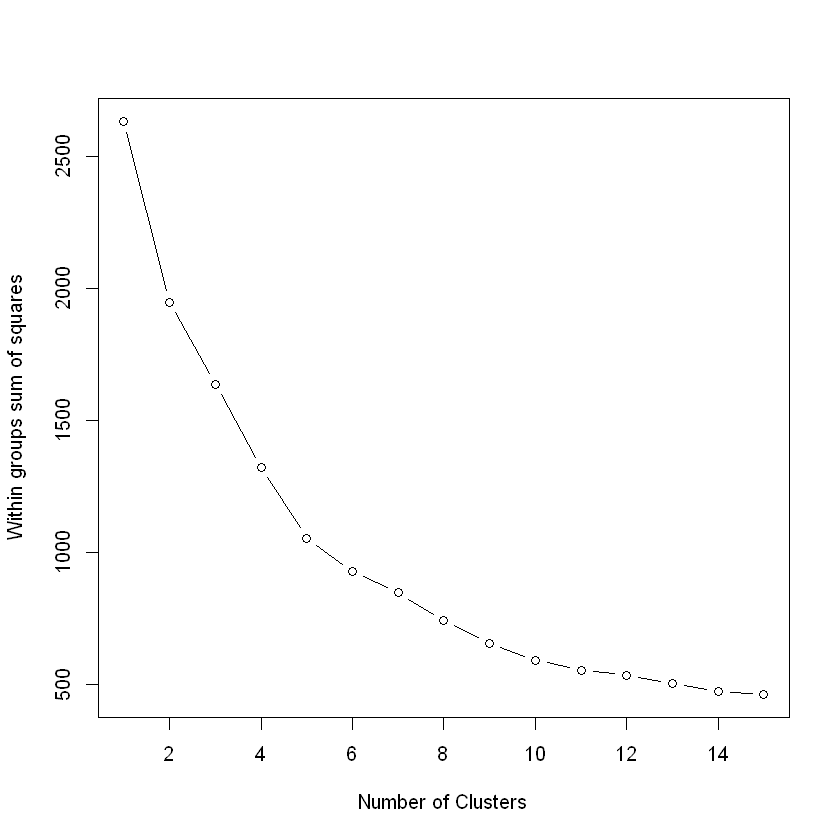

In [3]:
# Elbow Method: Help choose the value of K which minimize the standard deviation within each cluster
wssplot <- function(data, nc=15, seed=1234){
  wss <- (nrow(data)-1)*sum(apply(data,2,var))
  for (i in 2:nc){
    set.seed(seed)
    wss[i] <- sum(kmeans(data, centers=i)$withinss)}
  plot(1:nc, wss, type="b", xlab="Number of Clusters",
       ylab="Within groups sum of squares")}

wssplot(sale.group)  


Based on this elbow method, we would select 5 clusters. 

Notice: Another way of finding the optimal K is ploting of Hubert index. The Hubert index is a graphical method of determining the number of clusters.In the plot of Hubert index, we seek a significant knee that corresponds to a significant increase of the value of the measure i.e the significant peak in Hubert index second differences plot. 


  There is a binary version available but the source version is later:
        binary source needs_compilation
NbClust    3.0  3.0.1             FALSE



installing the source package 'NbClust'



*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


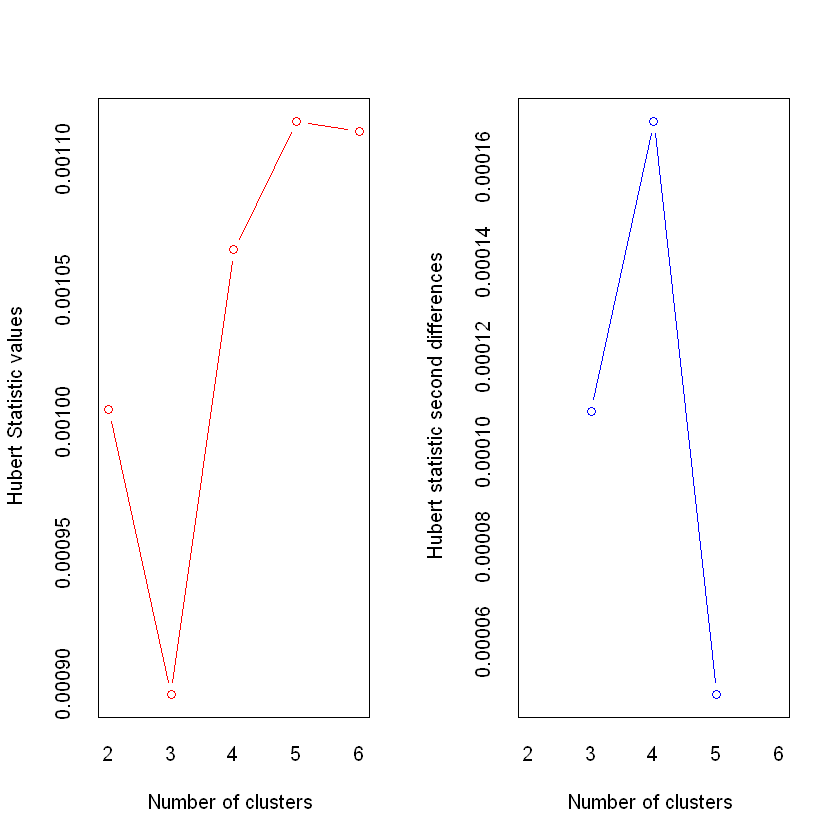

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 7 proposed 2 as the best number of clusters 
* 5 proposed 3 as the best number of clusters 
* 6 proposed 4 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 4 proposed 6 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 



0 2 3 4 5 6 
2 7 5 6 2 4 

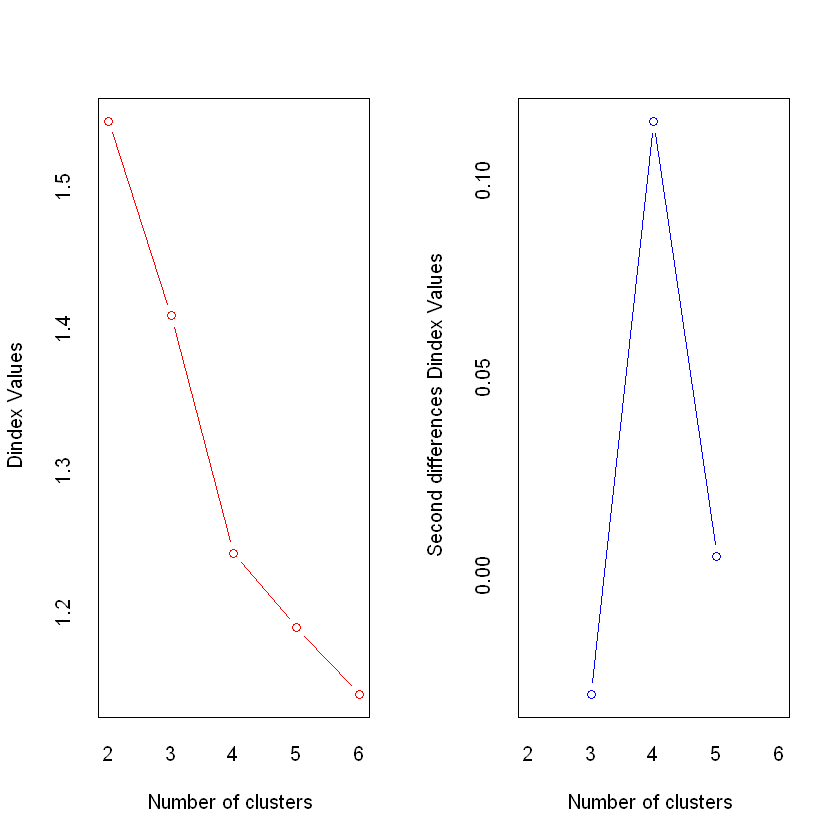

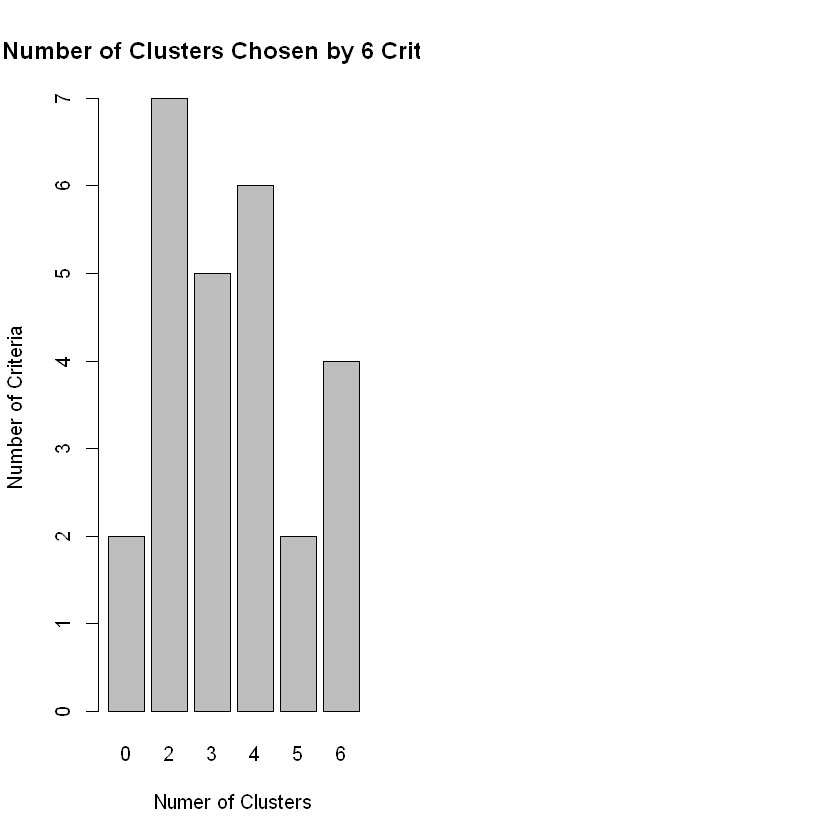

In [4]:
# We can also look at how the optimal K changes along with the number of criteria

install.packages("NbClust")
library(NbClust)
set.seed(12345)
nc <- NbClust(sale.group, min.nc=2, max.nc=6, method="kmeans")
table(nc$Best.n[1,])

barplot(table(nc$Best.n[1,]), 
          xlab="Numer of Clusters", ylab="Number of Criteria",
          main="Number of Clusters Chosen by 6 Criteria")


**Answer: k = 5**

Tip: Practically when choosing K we usually need to consider how many clusters will best answer downstream questions. 

#### 2) If we set K = 5, how do the spendings on Fresh and Frozen foods of each cluster look like?

In [5]:
result <- kmeans(sale.group, 5)  
Cluster_centroids <- as.data.frame(result$centers)
spending <- Cluster_centroids
spending$Fresh <- (spending$Fresh * fresh_sd) + fresh_mean
spending$Frozen <- (spending$Frozen * frozen_sd) + frozen_mean

# the spending on fresh food for the five clusters
spending[,1]

# the spending on frozen food for the five clusters
spending[,4]









[1]  6731.609  5731.607 30445.000 33897.091  9677.008

[1] 1488.373 1661.500 9122.833 9181.491 2413.643

In [6]:
## spending of all the categories in the five clusters 
spending

Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
6731.609,0.3767543,0.4684799,1488.373,0.4216243,0.00300843
5731.607,1.3928080,2.1235120,1661.500,2.3920702,0.19597323
30445.000,5.8244179,4.1134434,9122.833,3.4626351,3.99782720
33897.091,-0.1172609,-0.2469785,9181.491,-0.4298107,0.38598244
9677.008,-0.4520280,-0.5065891,2413.643,-0.4584766,-0.21176006


#### 3) How well did the K-means clustering uncover the actual structure of the data contained in the Channel variable?

In [7]:
install.packages("flexclust")
library(flexclust)

also installing the dependency 'modeltools'




  There is a binary version available but the source version is later:
          binary source needs_compilation
flexclust  1.4-0  1.4-1              TRUE

  Binaries will be installed
package 'modeltools' successfully unpacked and MD5 sums checked
package 'flexclust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Erlangga\AppData\Local\Temp\RtmpoZNHJp\downloaded_packages


Warning message:
"package 'flexclust' was built under R version 3.6.3"Loading required package: grid
Loading required package: lattice
Loading required package: modeltools
Warning message:
"package 'modeltools' was built under R version 3.6.3"Loading required package: stats4


In [8]:
# A cross-tabulation of Channel and cluster membership is given by

ch.fit <- table(sale$Channel, result$cluster)
ch.fit
randIndex(ch.fit) 






   
      1   2   3   4   5
  1  24   0   1  50 223
  2  86  28   5   5  18

ARI 
0.3937718

**Answer:** 

**ARI is the adjusted Rand index**. The Rand index is a measure of the similarity between two data clusterings. Here ARI is 0.33, so the similarity between the two clusterings is not very similar. 

The clusters based on annual spending doesn't quite represent Channel structure which implies the marketing campaigns may not necessarily be channel-specific.


### Exercise 2: Image Compression

#### 1) Think about how K-means can be applied on image data compression

If we see each pixel as a data point then choose the number of colours(K) that best groups the pixels in 3-dimensional(RGB encoding) space. The K-means clustering will reduce the colours of the image to K. It's a practice of balancing between efficiency and sharpness.


#### 2) Plot the original image 
Find the sample JPG. picture below:
https://ibm.box.com/shared/static/w9nnfoxpr9rnb1qw82gcrapgadzh3onn.jpg

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<font size = 3><strong>Comment:</strong></font>
<br>
<br>
Added code to download the image and store it under resources.<p></p>

</div>

In [10]:
library(jpeg)
pic <- readJPEG("dolphin.jpg")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


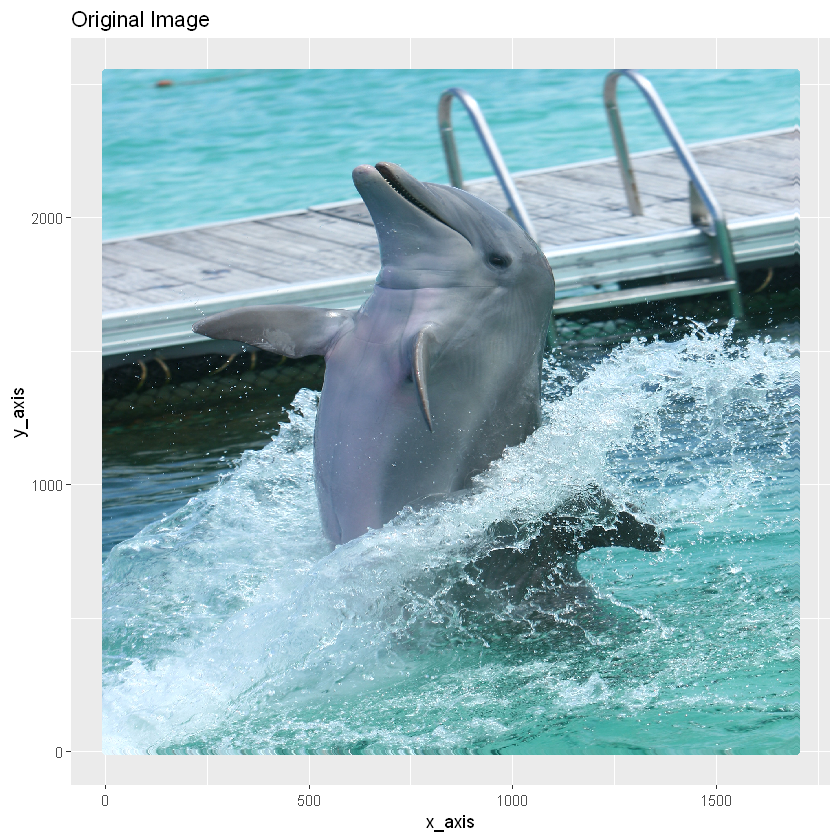

In [11]:
#Obtain the location and colour dimensions of pixels from the image
imgDm <- dim(pic)

picRGB <- data.frame(
  x_axis = rep(1:imgDm[2], each = imgDm[1]),
  y_axis = rep(imgDm[1]:1, imgDm[2]),
  R = as.vector(pic[,,1]),
  G = as.vector(pic[,,2]),
  B = as.vector(pic[,,3])
)

library(ggplot2)
ggplot(data = picRGB, aes(x = x_axis, y = y_axis)) +
  geom_point(colour = rgb(picRGB[ c("R", "G", "B")])) +
  labs(title = "Original Image") +
  xlab("x_axis") +
  ylab("y_axis")







#### 3) Applying K-means clustering on pixels
To do this, you will first run K-Means on the colors of the pixels in the image and then you will map each pixel on to it's closest centroid.
The choice of K determines how many colors are used to re-create. The lower the K is the more compressed the image.

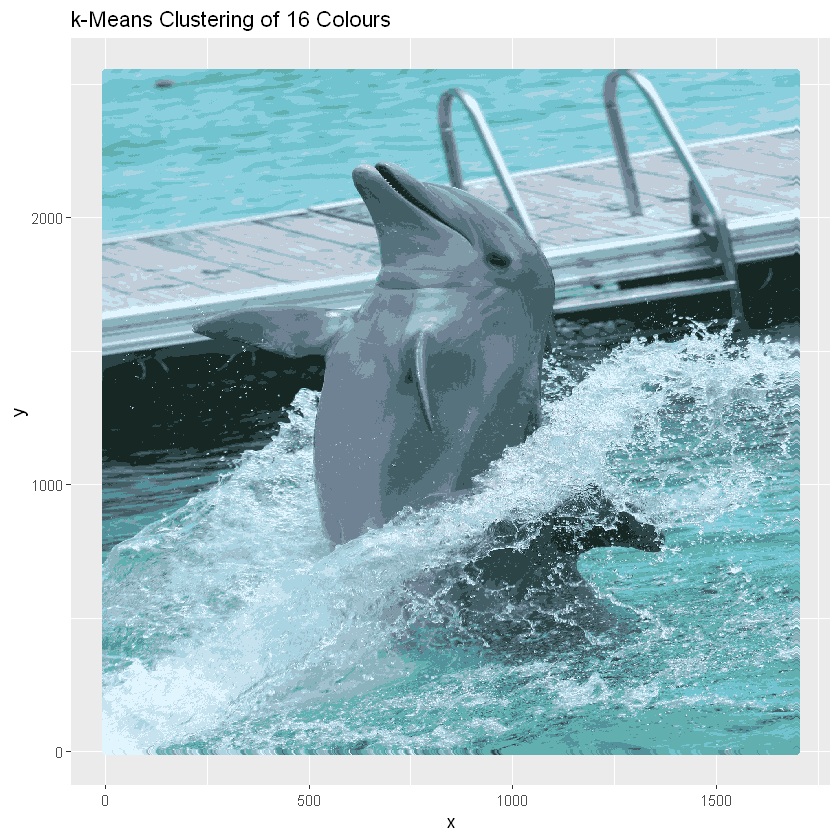

In [12]:
# We are now trying to compress the image to 16 colours
kClusters <- 16
kMeans16 <- kmeans(picRGB[, c("R", "G", "B")], centers = kClusters)

kColours <- rgb(kMeans16$centers[kMeans16$cluster,])

ggplot(data = picRGB, aes(x = x_axis, y = y_axis)) + 
  geom_point(colour = kColours) +
  labs(title = paste("k-Means Clustering of", kClusters, "Colours")) +
  xlab("x") +
  ylab("y")

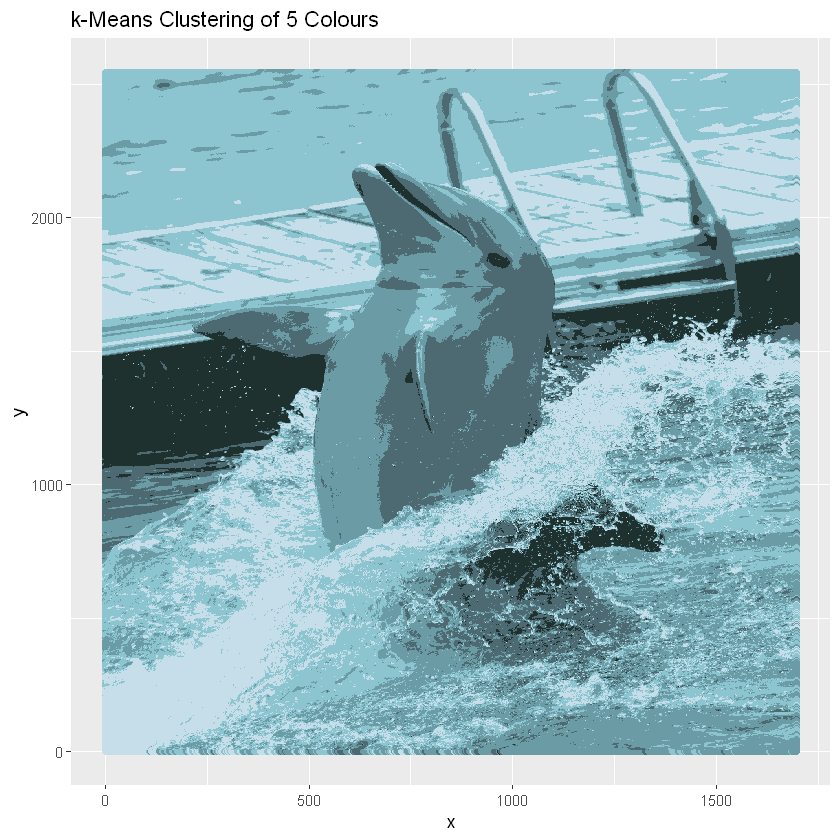

In [13]:
# Changing the k to 5
kClusters <- 5
kMeans5 <- kmeans(picRGB[, c("R", "G", "B")], centers = kClusters)

kColours <- rgb(kMeans5$centers[kMeans5$cluster,])

ggplot(data = picRGB, aes(x = x_axis, y = y_axis)) + 
  geom_point(colour = kColours) +
  labs(title = paste("k-Means Clustering of", kClusters, "Colours")) +
  xlab("x") +
  ylab("y")

#As you can see the image got quite blurred using only 5 colours

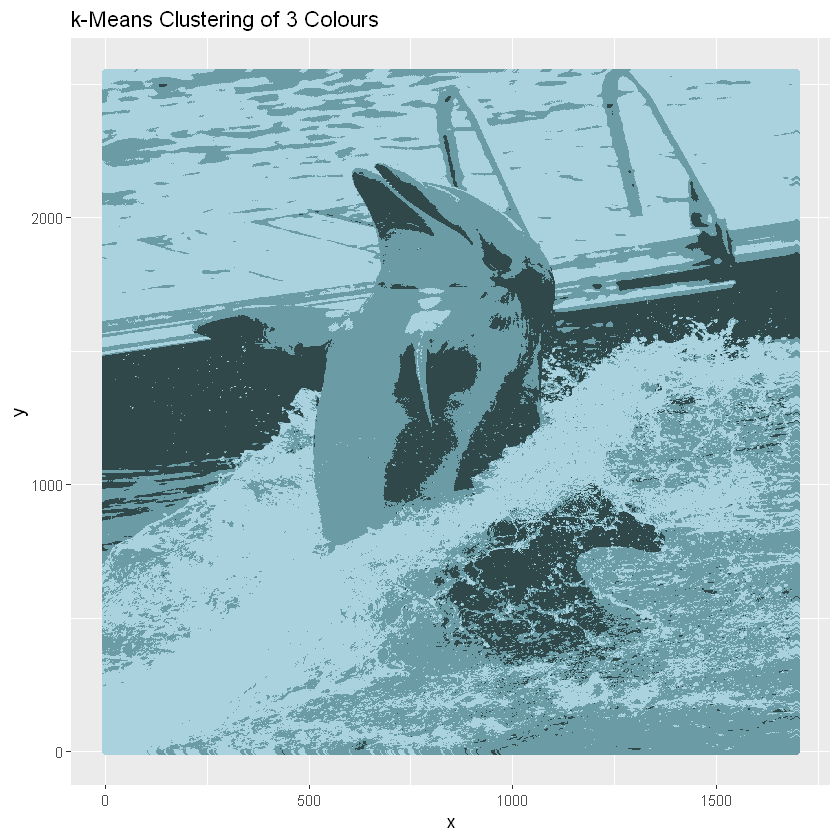

In [14]:
# Lastly we further compress the picture to 3 colours
kClusters <- 3
kMeans3 <- kmeans(picRGB[, c("R", "G", "B")], centers = kClusters)

kColours <- rgb(kMeans3$centers[kMeans3$cluster,])

ggplot(data = picRGB, aes(x = x_axis, y = y_axis)) + 
  geom_point(colour = kColours) +
  labs(title = paste("k-Means Clustering of", kClusters, "Colours")) +
  xlab("x") +
  ylab("y")
# Look at how the K value changes the sharpness of the imag!
# It looks like the dolphine is disappearing in the water!